# <span style="color:#808080"><strong>Electronic Store Data Analysis</strong></span>

##### <span style="color:#808080">By: Keith Vincent Burca</span>

### <span style="color:#808080">Introduction</span>

**Business Task** - Analyze sales data to gain valuable insights into the business.  
**Time Given** - 7 days

The dataset contains 14 columns described below:

Variable  |Description |
-----|-----|
Product|Represents the type of product being sold, such as a laptop, smartphone, tablet, etc.|
Quantity|Indicates the quantity of the product sold in a particular transaction
Price|Denotes the price of the product in the local currency
Rating|Represents the customer rating for the product, usually on a scale from 3.0 to 5.0
Date|Represents the date of the transaction when the product was sold
CustomerID|A unique identifier for each customer. It could be a UUID (Universally Unique Identifier) or any other unique identifier
Region|Specifies the region where the sale occurred, such as North, South, East, or West
Discount|Represents the discount applied to the product in percentage. It could influence the final price
Profit|Denotes the profit generated from the sale of the product. It's calculated as the difference between price and cost
ShippingCost|Represents the cost associated with shipping the product. It includes expenses related to logistics
Color|Specifies the color of the product, such as Red, Blue, Green, Black, or White
Weight|Represents the weight of the product, which can be useful for logistics and shipping calculations
Brand|Indicates the brand of the product, such as BrandA, BrandB, or BrandC
Warranty|Represents the duration of the product warranty in years. It could be 1, 2, or 3 years

Based on the information we have so far, it is evident that the dataset comprises data for an electronic sales company. Our primary objective for this analysis is to assist the company in optimizing revenue and enhancing profitability.

### <span style="color:#808080">Import Packages</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import (KElbowVisualizer, 
    InterclusterDistance)

import warnings
warnings.filterwarnings("ignore")

### <span style="color:#808080">Load Dataset</span>

In [2]:
df0 = pd.read_csv("/kaggle/input/legalmatch/sales_data (1).csv")

df0.head()

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty
0,Printer,72.0,140.594569,3.6,2023-10-11,d63ae167-8278-40e1-a9c1-200913fec2e0,North,0.42,167.19,14.22,Red,4.37,BrandB,2.0
1,Headphones,24.0,113.966554,4.7,2022-12-13,8ed74bb6-28c2-447d-bab5-29d5c8294fdc,West,0.01,96.34,18.27,Green,1.55,BrandA,2.0
2,Monitor,35.0,993.399051,3.6,2023-07-10,7996d189-5b78-42f3-a4e1-b5df0e375a5c,West,0.18,196.97,18.90,Green,5.22,BrandA,3.0
3,Keyboard,148.0,1964.466015,4.7,2022-12-23,18af4d28-3ed9-4936-b466-38982bb08f22,West,0.36,103.72,1.75,NaN,8.56,BrandB,3.0
4,Printer,91.0,1059.864257,3.2,2023-09-30,fdb98733-2996-4082-b80a-ba700b75e8f3,West,0.45,196.17,9.73,Blue,9.16,BrandC,3.0


Gather basic information and descriptive statistics about the data.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Product       object 
 1   Quantity      float64
 2   Price         float64
 3   Rating        float64
 4   Date          object 
 5   CustomerID    object 
 6   Region        object 
 7   Discount      float64
 8   Profit        float64
 9   ShippingCost  float64
 10  Color         object 
 11  Weight        float64
 12  Brand         object 
 13  Warranty      float64
dtypes: float64(8), object(6)
memory usage: 213.6+ MB


The dataset has 2,000,000 rows.

In [4]:
df0.describe(include='all')

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty
count,1992896,1.993050e+06,1.992846e+06,1.992827e+06,1993010,1992752,1992809,1.992820e+06,1.992892e+06,1.992799e+06,1992764,1.992910e+06,1992878,1.992929e+06
unique,44,NaN,NaN,NaN,365,1478351,20,NaN,NaN,NaN,25,NaN,15,NaN
top,Smartphone,NaN,NaN,NaN,2023-08-03,ff8d7f7d-a7e7-4f75-9d51-3241098259c3,East,NaN,NaN,NaN,Green,NaN,BrandA,NaN
freq,219647,NaN,NaN,NaN,5659,534,493829,NaN,NaN,NaN,395231,NaN,658254,NaN
mean,NaN,9.998436e+01,1.010007e+03,4.000407e+00,NaN,NaN,NaN,2.549747e-01,1.024809e+02,1.050089e+01,NaN,5.251769e+00,NaN,1.999958e+00
std,NaN,5.742302e+01,5.715155e+02,5.786937e-01,NaN,NaN,NaN,1.415963e-01,5.626797e+01,5.483808e+00,NaN,2.739724e+00,NaN,8.167861e-01
min,NaN,1.000000e+00,2.000121e+01,3.000000e+00,NaN,NaN,NaN,1.000000e-02,5.000000e+00,1.000000e+00,NaN,5.000000e-01,NaN,1.000000e+00
25%,NaN,5.000000e+01,5.149208e+02,3.500000e+00,NaN,NaN,NaN,1.300000e-01,5.376000e+01,5.750000e+00,NaN,2.880000e+00,NaN,1.000000e+00
50%,NaN,1.000000e+02,1.010177e+03,4.000000e+00,NaN,NaN,NaN,2.500000e-01,1.025100e+02,1.050000e+01,NaN,5.250000e+00,NaN,2.000000e+00
75%,NaN,1.500000e+02,1.504655e+03,4.500000e+00,NaN,NaN,NaN,3.800000e-01,1.511600e+02,1.525000e+01,NaN,7.620000e+00,NaN,3.000000e+00


Based on the table shown above, it is apparent that each column contains null values.

### <span style="color:#808080">Data Pre-processing</span>

Check for duplicates.

In [5]:
df0.duplicated().sum()

0

The dataset has no duplicates.

Next, let us check for missing values in the dataset.

In [6]:
df0.isna().sum()

Product         7104
Quantity        6950
Price           7154
Rating          7173
Date            6990
CustomerID      7248
Region          7191
Discount        7180
Profit          7108
ShippingCost    7201
Color           7236
Weight          7090
Brand           7122
Warranty        7071
dtype: int64

In [7]:
len(df0[df0.isna().any(axis=1)].index)

97609

97,609 rows contain at least one null value. Since the dataset is very large and and only about 5% of the rows contain at least one null value, we can remove these rows.

In [8]:
df111 = df0.dropna(how='any',axis=0)

In [9]:
df1 = df0.dropna(how='any',axis=0)
df1.head()

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty
0,Printer,72.0,140.594569,3.6,2023-10-11,d63ae167-8278-40e1-a9c1-200913fec2e0,North,0.42,167.19,14.22,Red,4.37,BrandB,2.0
1,Headphones,24.0,113.966554,4.7,2022-12-13,8ed74bb6-28c2-447d-bab5-29d5c8294fdc,West,0.01,96.34,18.27,Green,1.55,BrandA,2.0
2,Monitor,35.0,993.399051,3.6,2023-07-10,7996d189-5b78-42f3-a4e1-b5df0e375a5c,West,0.18,196.97,18.90,Green,5.22,BrandA,3.0
4,Printer,91.0,1059.864257,3.2,2023-09-30,fdb98733-2996-4082-b80a-ba700b75e8f3,West,0.45,196.17,9.73,Blue,9.16,BrandC,3.0
5,Tablet,147.0,74.266075,4.6,2022-12-07,f61eaec0-2653-497f-aa88-b2ee3e90d2d9,East,0.47,108.79,18.69,Green,5.61,BrandB,2.0


Validate dataframe has no null values anymore.

In [10]:
df1.isna().sum()

Product         0
Quantity        0
Price           0
Rating          0
Date            0
CustomerID      0
Region          0
Discount        0
Profit          0
ShippingCost    0
Color           0
Weight          0
Brand           0
Warranty        0
dtype: int64

Construct box plots to check for outliers.

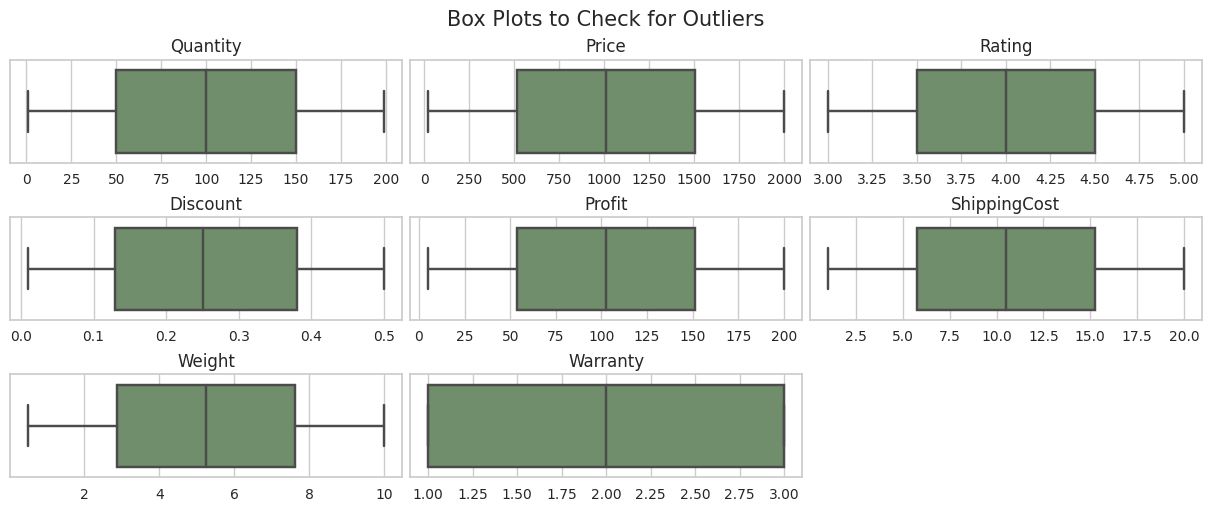

In [11]:
fig, ax = plt.subplots(3, 3, figsize = (12,5), layout='constrained')
fig.suptitle('Box Plots to Check for Outliers', fontsize='15')
sns.boxplot(x=df1['Quantity'], color ='#6c9466', ax=ax[0][0])
ax[0][0].set_title('Quantity')
ax[0][0].set_ylabel(None)
ax[0][0].set_xlabel(None)

sns.boxplot(x=df1['Price'], color ='#6c9466', ax=ax[0][1])
ax[0][1].set_title('Price')
ax[0][1].set_ylabel(None)
ax[0][1].set_xlabel(None)

sns.boxplot(x=df1['Rating'], color ='#6c9466', ax=ax[0][2])
ax[0][2].set_title('Rating')
ax[0][2].set_ylabel(None)
ax[0][2].set_xlabel(None)

sns.boxplot(x=df1['Discount'], color ='#6c9466', ax=ax[1][0])
ax[1][0].set_title('Discount')
ax[1][0].set_ylabel(None)
ax[1][0].set_xlabel(None)

sns.boxplot(x=df1['Profit'], color ='#6c9466', ax=ax[1][1])
ax[1][1].set_title('Profit')
ax[1][1].set_ylabel(None)
ax[1][1].set_xlabel(None)

sns.boxplot(x=df1['ShippingCost'], color ='#6c9466', ax=ax[1][2])
ax[1][2].set_title('ShippingCost')
ax[1][2].set_ylabel(None)
ax[1][2].set_xlabel(None)

sns.boxplot(x=df1['Weight'], color ='#6c9466', ax=ax[2][0])
ax[2][0].set_title('Weight')
ax[2][0].set_ylabel(None)
ax[2][0].set_xlabel(None)

sns.boxplot(x=df1['Warranty'], color ='#6c9466', ax=ax[2][1])
ax[2][1].set_title('Warranty')
ax[2][1].set_ylabel(None)
ax[2][1].set_xlabel(None)

fig.delaxes(ax[2][2])

Check for unusual values on the non-numerical fields.

In [12]:
df1['Product'].value_counts()

Product
Printer                  209699
Tablet                   209639
Smartphone               209620
Headphones               209478
Mouse                    209396
Keyboard                 209162
External Hard Drive      208896
Monitor                  208694
Laptop                   208558
Monitors                   1156
External Hard Drives       1147
Smartphones                1107
Laptops                    1098
mouse                      1086
headphones                 1074
laptop                     1072
printer                    1065
Mouses                     1062
Keyboards                  1054
smartphone                 1052
monitor                    1044
Tablets                    1038
keyboard                   1037
Headphoness                1031
tablet                     1027
Printers                   1024
external hard drive        1007
headphoness                   8
smartphones                   7
tablets                       6
printers                      6


In [13]:
# df111=df1.copy()
# df111['Product'].value_counts()

In [14]:
# df111[mention columns here].replace('[s]+$', '', regex=True, inplace=True)

In [15]:
# df111.head(2)

In [16]:
# df111['Product']=df111['Product'].str.capitalize()

In [17]:
# df111['Product'].value_counts()

In [18]:
df1['Product']=df1['Product'].replace(['Monitors','monitor','monitors','Monitorss'], 'Monitor')
df1['Product']=df1['Product'].replace(['External Hard Drives','external hard drive','External Hard Drivess','external hard drives'], 'External Hard Drive')
df1['Product']=df1['Product'].replace(['Smartphones','smartphone','smartphones','Smartphoness'], 'Smartphone')
df1['Product']=df1['Product'].replace(['Laptops','laptop','laptops','Laptopss'], 'Laptop')
df1['Product']=df1['Product'].replace(['mouse','Mouses','mouses','Mousess'], 'Mouse')
df1['Product']=df1['Product'].replace(['headphones','Headphoness','headphoness'], 'Headphones')
df1['Product']=df1['Product'].replace(['printer','Printers','printers','Printerss'], 'Printer')
df1['Product']=df1['Product'].replace(['Keyboards','keyboard','keyboards','Keyboardss'], 'Keyboard')
df1['Product']=df1['Product'].replace(['Tablets','tablet','tablets','Tabletss'], 'Tablet')

Verify all product names are uniform.

In [19]:
df1['Product'].value_counts()

Product
Printer                211797
Smartphone             211787
Tablet                 211714
Headphones             211591
Mouse                  211552
Keyboard               211260
External Hard Drive    211058
Monitor                210899
Laptop                 210733
Name: count, dtype: int64

Check for unusual values in the `Region` column and replace them.

In [20]:
df1['Region'].value_counts()

Region
East       471453
South      471372
West       470520
North      470309
west         2415
east         2397
Easts        2354
north        2328
Wests        2309
Norths       2297
south        2291
Souths       2282
easts          12
norths         11
souths         11
wests           9
Northss         8
Westss          5
Southss         4
Eastss          4
Name: count, dtype: int64

In [21]:
df1['Region']=df1['Region'].replace(['west','Wests','wests','Westss'], 'West')
df1['Region']=df1['Region'].replace(['east','Easts','easts','Eastss'], 'East')
df1['Region']=df1['Region'].replace(['north','Norths','norths','Northss'], 'North')
df1['Region']=df1['Region'].replace(['south','Souths','souths','Southss'], 'South')

Verify all regions are correctly named.

In [22]:
df1['Region'].value_counts()

Region
East     476220
South    475960
West     475258
North    474953
Name: count, dtype: int64

In [23]:
df1['Color'].value_counts()

Color
Green      377352
Red        377023
Blue       376889
Black      376413
White      375956
green        1927
white        1917
Whites       1902
Reds         1873
Greens       1863
red          1863
Blues        1849
blue         1849
Blacks       1845
black        1811
greens         13
reds            7
Greenss         6
Whitess         6
blues           6
blacks          5
Redss           5
whites          5
Bluess          4
Blackss         2
Name: count, dtype: int64

In [24]:
df1['Color']=df1['Color'].replace(['green','Greens','greens','Greenss'], 'Green')
df1['Color']=df1['Color'].replace(['white','Whites','Whitess','whites'], 'White')
df1['Color']=df1['Color'].replace(['Reds','red','reds','Redss'], 'Red')
df1['Color']=df1['Color'].replace(['Blues','blue','blues','Bluess'], 'Blue')
df1['Color']=df1['Color'].replace(['Blacks','black','blacks','Blackss'], 'Black')

Verify all colors are correctly named.

In [25]:
df1['Color'].value_counts()

Color
Green    381161
Red      380771
Blue     380597
Black    380076
White    379786
Name: count, dtype: int64

Check for unusual values in the `Brand` column and replace them.

In [26]:
df1['Brand'].value_counts()

Brand
BrandA      628322
BrandB      628272
BrandC      626766
brandb        3230
brandc        3186
BrandCs       3165
BrandAs       3151
BrandBs       3110
branda        3105
brandbs         21
brandcs         20
brandas         14
BrandBss        11
BrandAss        10
BrandCss         8
Name: count, dtype: int64

In [27]:
df1['Brand']=df1['Brand'].replace(['BrandAs','branda','brandas','BrandAss'], 'BrandA')
df1['Brand']=df1['Brand'].replace(['brandb','BrandBs','brandbs','BrandBss'], 'BrandB')
df1['Brand']=df1['Brand'].replace(['brandc','brandcs','BrandCs','BrandCss'], 'BrandC')

Verify all brands are correctly named.

In [28]:
df1['Brand'].value_counts()

Brand
BrandB    634644
BrandA    634602
BrandC    633145
Name: count, dtype: int64

In [29]:
df1.head()

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty
0,Printer,72.0,140.594569,3.6,2023-10-11,d63ae167-8278-40e1-a9c1-200913fec2e0,North,0.42,167.19,14.22,Red,4.37,BrandB,2.0
1,Headphones,24.0,113.966554,4.7,2022-12-13,8ed74bb6-28c2-447d-bab5-29d5c8294fdc,West,0.01,96.34,18.27,Green,1.55,BrandA,2.0
2,Monitor,35.0,993.399051,3.6,2023-07-10,7996d189-5b78-42f3-a4e1-b5df0e375a5c,West,0.18,196.97,18.90,Green,5.22,BrandA,3.0
4,Printer,91.0,1059.864257,3.2,2023-09-30,fdb98733-2996-4082-b80a-ba700b75e8f3,West,0.45,196.17,9.73,Blue,9.16,BrandC,3.0
5,Tablet,147.0,74.266075,4.6,2022-12-07,f61eaec0-2653-497f-aa88-b2ee3e90d2d9,East,0.47,108.79,18.69,Green,5.61,BrandB,2.0


Verify all date entries follow YYYY-MM-DD format, which has 10 characters.

In [30]:
df1[df1['Date'].str.len()!=10]

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty


In [31]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [32]:
df1['Date'].min()

Timestamp('2022-10-16 00:00:00')

In [33]:
df1['Date'].max()

Timestamp('2023-10-15 00:00:00')

In [34]:
sum(df1.Profit > df1.Price)

79881

There are 79,881 rows, which represents only about 4% of the total rows, where the Profit is higher than the Price. This is unlikely so we will proceed with dropping these columns.

In [35]:
df1.shape

(1902391, 14)

In [36]:
df1 = df1[df1.Profit < df1.Price]

In [37]:
df1.shape

(1822510, 14)

After data cleaning, our dataset still has 14 columns and 1,822,510 rows.

In [38]:
df1.head()

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty
1,Headphones,24.0,113.966554,4.7,2022-12-13,8ed74bb6-28c2-447d-bab5-29d5c8294fdc,West,0.01,96.34,18.27,Green,1.55,BrandA,2.0
2,Monitor,35.0,993.399051,3.6,2023-07-10,7996d189-5b78-42f3-a4e1-b5df0e375a5c,West,0.18,196.97,18.90,Green,5.22,BrandA,3.0
4,Printer,91.0,1059.864257,3.2,2023-09-30,fdb98733-2996-4082-b80a-ba700b75e8f3,West,0.45,196.17,9.73,Blue,9.16,BrandC,3.0
7,Monitor,49.0,1480.698227,4.6,2022-12-19,47b18bee-4b66-4a8e-b455-31e5086da284,East,0.17,161.25,18.03,White,6.76,BrandC,3.0
8,Keyboard,20.0,1398.881988,4.9,2023-07-01,233fe344-5ed6-40c2-bf09-fa045b18fcb7,South,0.03,84.61,8.93,Black,5.30,BrandC,1.0


### <span style="color:#808080">Feature Engineering</span>

Create a `Month` column.

In [39]:
df1['Month']=df1['Date'].dt.strftime('%B')

Create a `Year` column.

In [40]:
df1['Year']=df1['Date'].dt.strftime('%Y')

In [41]:
df1['Year'].value_counts()

Year
2023    1439010
2022     383500
Name: count, dtype: int64

The dataset contains data from the last two years, which means insights we can gain from it is likely to remain relevant in the next few years.

Create a `WeightPerUnit` column.

In [42]:
df1['WeightPerUnit']=df1['Weight']/df1['Quantity']

Verify all new features are added in the dataset.

In [43]:
df1.head()

,Product,Quantity,Price,Rating,Date,CustomerID,Region,Discount,Profit,ShippingCost,Color,Weight,Brand,Warranty,Month,Year,WeightPerUnit
1,Headphones,24.0,113.966554,4.7,2022-12-13,8ed74bb6-28c2-447d-bab5-29d5c8294fdc,West,0.01,96.34,18.27,Green,1.55,BrandA,2.0,December,2022,0.064583
2,Monitor,35.0,993.399051,3.6,2023-07-10,7996d189-5b78-42f3-a4e1-b5df0e375a5c,West,0.18,196.97,18.90,Green,5.22,BrandA,3.0,July,2023,0.149143
4,Printer,91.0,1059.864257,3.2,2023-09-30,fdb98733-2996-4082-b80a-ba700b75e8f3,West,0.45,196.17,9.73,Blue,9.16,BrandC,3.0,September,2023,0.100659
7,Monitor,49.0,1480.698227,4.6,2022-12-19,47b18bee-4b66-4a8e-b455-31e5086da284,East,0.17,161.25,18.03,White,6.76,BrandC,3.0,December,2022,0.137959
8,Keyboard,20.0,1398.881988,4.9,2023-07-01,233fe344-5ed6-40c2-bf09-fa045b18fcb7,South,0.03,84.61,8.93,Black,5.30,BrandC,1.0,July,2023,0.265000


### <span style="color:#808080">Exploratory Data Analysis</span>

For this stage, we aim to answer the following questions:  
* Are there products that are performing better  or underperforming compared to others?
* Are there products that are rated better than other products?
* Are there products that are sold seasonally?
* Are there unusual patterns that can be seen from the data?

Define variables for ordering categorical variables in visualizations.

In [44]:
products = ['Printer', 'Smartphone', 'Tablet', 'Headphones', 'Mouse', 'Keyboard', 'External Hard Drive', 'Monitor', 'Laptop']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

Compare different product types in terms of the numerical metrics.

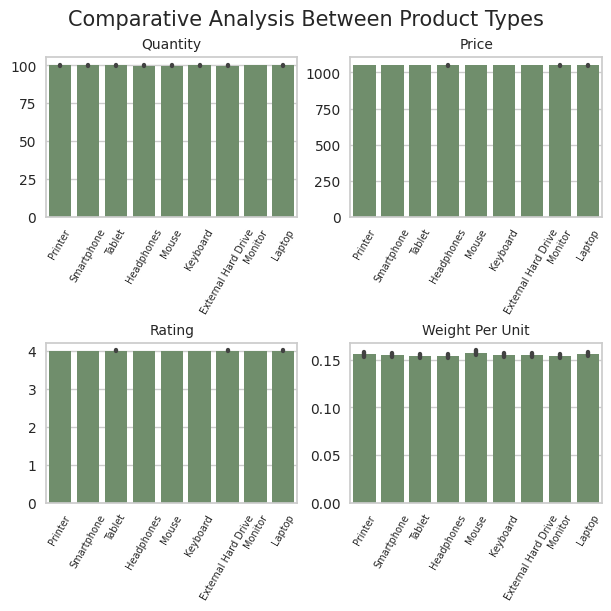

In [45]:
fig, ax = plt.subplots(2, 2, figsize = (6,6), layout='constrained')
fig.suptitle('Comparative Analysis Between Product Types', fontsize='15')

sns.barplot(data=df1, x='Product', y='Quantity', color ='#6c9466', ax=ax[0][0], order = products)
ax[0][0].set_title('Quantity', fontsize='10')
ax[0][0].set_ylabel(None)
ax[0][0].set_xlabel(None)
ax[0][0].tick_params(axis='x', rotation=60, labelsize=7)

sns.barplot(data=df1, x='Product', y='Price', color ='#6c9466', ax=ax[0][1], order = products)
ax[0][1].set_title('Price', fontsize='10')
ax[0][1].set_ylabel(None)
ax[0][1].set_xlabel(None)
ax[0][1].tick_params(axis='x', rotation=60, labelsize=7)

sns.barplot(data=df1, x='Product', y='Rating', color ='#6c9466', ax=ax[1][0], order = products)
ax[1][0].set_title('Rating', fontsize='10')
ax[1][0].set_ylabel(None)
ax[1][0].set_xlabel(None)
ax[1][0].tick_params(axis='x', rotation=60, labelsize=7)

sns.barplot(data=df1, x='Product', y='WeightPerUnit', color ='#6c9466', ax=ax[1][1], order = products)
ax[1][1].set_title('Weight Per Unit', fontsize='10')
ax[1][1].set_ylabel(None)
ax[1][1].set_xlabel(None)
ax[1][1].tick_params(axis='x', rotation=60, labelsize=7)

Metrics are nearly uniform across all product types, including a consistent weight per unit. This consistency may suggest that certain products have bulkier packaging. The company should investigate this further to explore potential packaging optimization opportunities. Such optimization could lead to cost savings in production and inventory, ultimately boosting profits.

Check if certain products are sold seasonally.

In [46]:
season = df1.groupby(['Product','Month']).agg({'Quantity':'mean'})
season

Quantity
Product             Month                
External Hard Drive April      100.155951
                    August      99.983122
                    December    99.881029
                    February    99.260586
                    January    100.075147
...                                   ...
Tablet              March      100.084014
                    May         99.731689
                    November    99.602005
                    October     99.675289
                    September  100.384315

[108 rows x 1 columns]

Text(0, 0.5, 'Average Daily Quantity Sold')

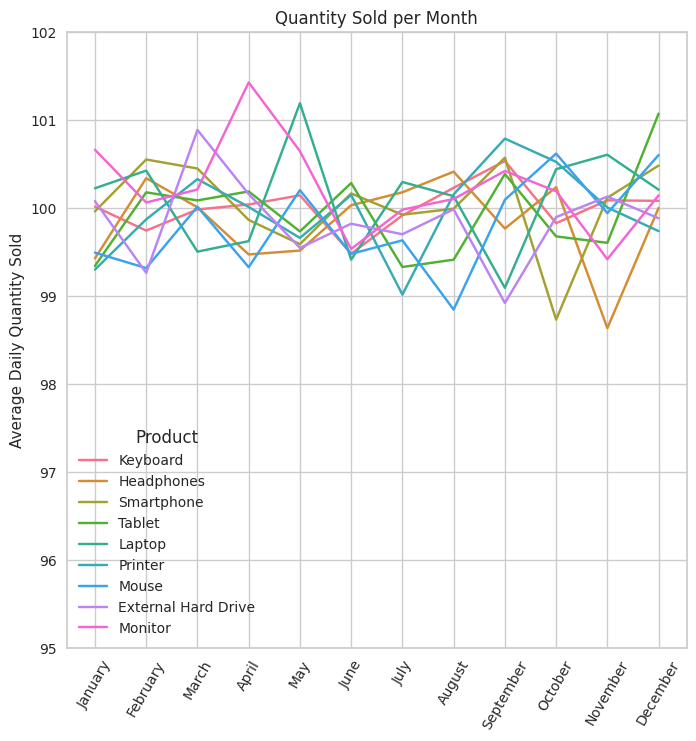

In [47]:
df_sort = season.sort_values('Month', key=lambda col: col.map(
    { 'January':1,'February':2,'March':3,'April':4, 'May':5, 'June':6, 'July':7, 'August':8,
     'September':9, 'October':10, 'November':11, 'December': 12}))
plt.figure(figsize=(8,8))
g = sns.lineplot(data=df_sort.reset_index(), x='Month', y="Quantity", hue="Product")
                 #,palette = sns.color_palette("mako_r", 6))
plt.title("Quantity Sold per Month")
plt.xticks(rotation=60)
plt.ylim((95,102))
plt.xlabel(None)
plt.ylabel("Average Daily Quantity Sold")

Based on the line graph, the mean daily quantity sold for all products are around 99 to 101 pieces. There are no sudden drops or highs, and sales are nearly consistent throughout the year. We can infer that no products are sold seasonally.

### <span style="color:#808080">Customer Segmentation</span>

Let us conduct an Recency, Frequency, Monetary (RFM) Analysis analysis so we can categorize our customers based on where they are on our sales funnel and tailor our marketing strategies to each segment's unique characteristics.

In [48]:
df1['Recency'] = (pd.Timestamp.today() - df1['Date']) / pd.Timedelta(1, 'D')

In [49]:
data1 = df1.groupby('CustomerID').size().to_frame('Frequency') \
    .join(df1.groupby('CustomerID').Price.sum().to_frame('Monetary'))  \
    .join(df1.groupby('CustomerID').Recency.min().to_frame('Recency'))
data1.head()

,Frequency,Monetary,Recency
CustomerID,,,
00000552-cc40-4cdc-a500-356b46657b39,1,1152.858798,448.236195
0000236a-c99a-414f-982a-19fcef7ff470,1,1675.080076,295.236195
000029e7-ed41-465e-a5d3-1a522b2f8e74,1,1780.921899,369.236195
00003a3f-7951-4e0d-9274-3e908eba55ef,1,1519.972249,117.236195
0000438b-d9c1-4464-b3c9-feb607e26aaa,1,409.492920,427.236195


<Axes: xlabel='Frequency', ylabel='Monetary'>

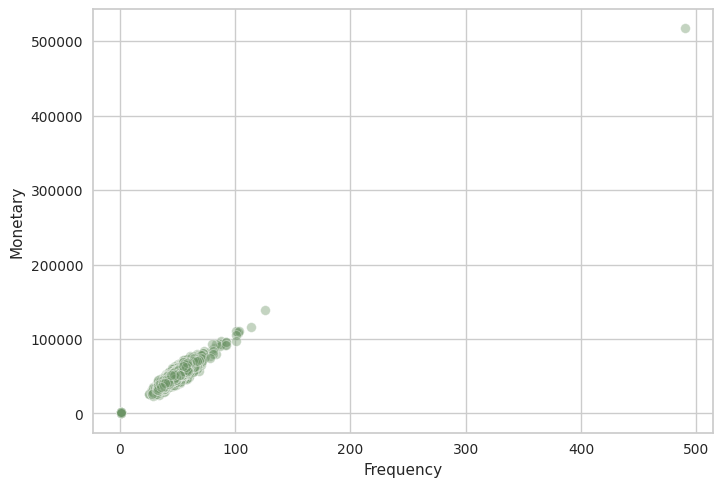

In [50]:
sns.scatterplot(data=data1, x='Frequency', y='Monetary', color='#6c9466', alpha=0.4)

Based from the graph, we have identified a data point that clearly appears to be an outlier. Let us proceed by removing that particular data point.

Mention na for now, delete lang sa ang >200, based sa business knwledge determine if valid or idelete

In [51]:
data1=data1[data1['Frequency']<200]

<Axes: xlabel='Frequency', ylabel='Monetary'>

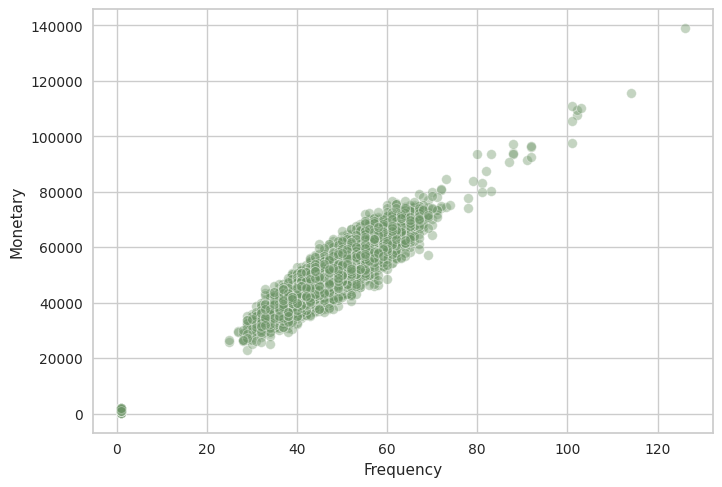

In [52]:
sns.scatterplot(data=data1, x='Frequency', y='Monetary', color='#6c9466', alpha=0.4)

<Axes: xlabel='Frequency', ylabel='Recency'>

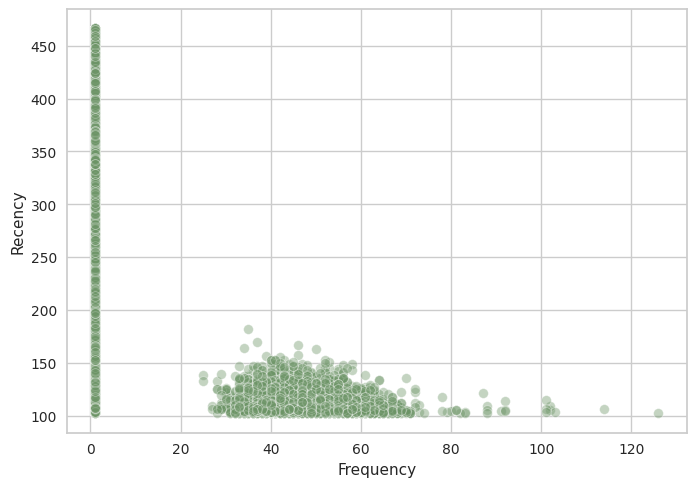

In [53]:
sns.scatterplot(data=data1, x='Frequency', y='Recency', color='#6c9466', alpha=0.4)

<Axes: xlabel='Recency', ylabel='Monetary'>

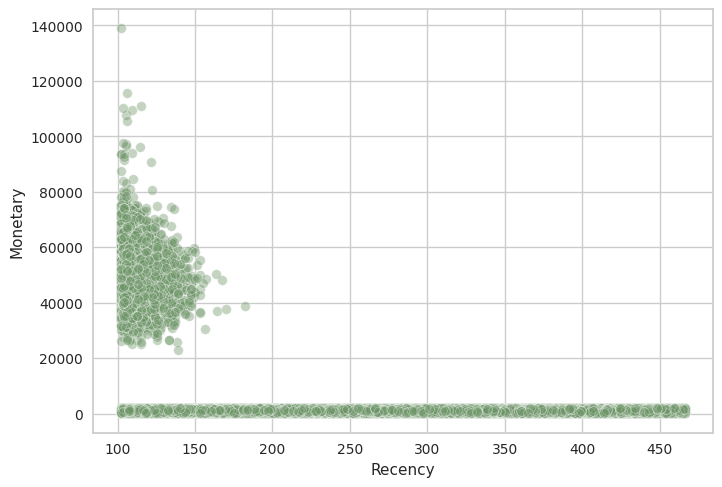

In [54]:
sns.scatterplot(data=data1, x='Recency', y='Monetary', color='#6c9466', alpha=0.4)

Based from the graphs, we can see that a huge portion of the customers have purchased only once.

For this project, we will be using K-means to cluster our customers based on their RFM characteristics. First, scale and transform data.

In [55]:
Scaled_data = StandardScaler().fit(data1).transform(data1)

Use elbow method to determine the optimum number of clusters.

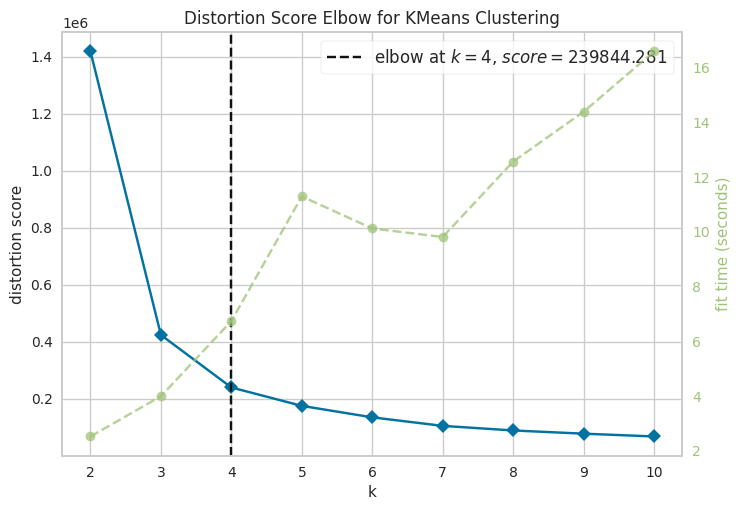

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=10, random_state=42)
visualizer.fit(Scaled_data)   
visualizer.show()

Based on the elbow method diagram, the optimum number of clusters is 4. the To simplify. we will only conduct K-means clustering with 4 clusters on our dataset as our baseline and final model. In practice, it is best to try different models, then choose a baseline model. After that, tune the baseline model by adjusting the hyperparameters such as the number of clusters.

In [57]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(data1)
data1['Segment'] = kmeans.labels_ + 1
data1.head()

,Frequency,Monetary,Recency,Segment
CustomerID,,,,
00000552-cc40-4cdc-a500-356b46657b39,1,1152.858798,448.236195,1
0000236a-c99a-414f-982a-19fcef7ff470,1,1675.080076,295.236195,1
000029e7-ed41-465e-a5d3-1a522b2f8e74,1,1780.921899,369.236195,1
00003a3f-7951-4e0d-9274-3e908eba55ef,1,1519.972249,117.236195,1
0000438b-d9c1-4464-b3c9-feb607e26aaa,1,409.492920,427.236195,3


Let us conduct a PCA (Principal Component Analysis) analysis to simplify the RFM components and visually depict the distinctions among the segments.

In [58]:
# data1_scaled = StandardScaler().fit_transform(data1)
# Scaled_data = StandardScaler().fit(data1).transform(data1)
pca = PCA(n_components=2)
pca.fit(Scaled_data)
x=pca.transform(Scaled_data)

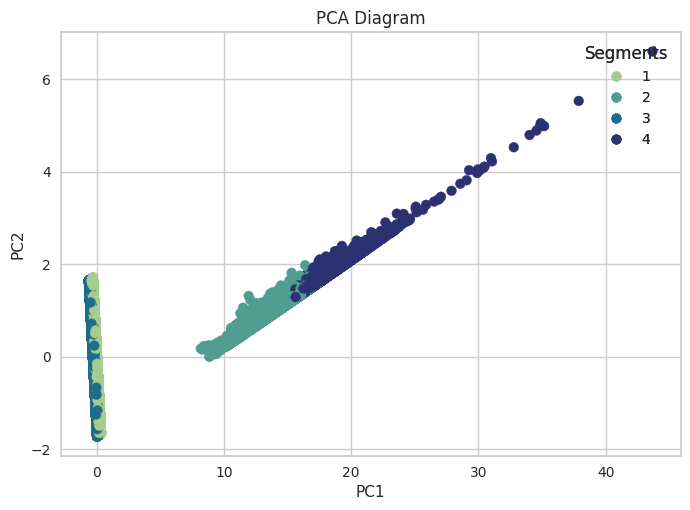

In [59]:
fig, ax = plt.subplots()
scatter = ax.scatter(x[:,0],x[:,1],c=data1['Segment'],cmap='crest')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Segments")
ax.add_artist(legend1)
plt.title('PCA Diagram')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Based on the PCA diagram, it is evident that the four segments exhibit distinct characteristics that set them apart from each other.

In [60]:
data1.groupby('Segment').mean()

,Frequency,Monetary,Recency
Segment,,,
1,1.000000,1525.160468,283.988533
2,43.468011,44377.959774,110.227946
3,1.000000,575.086687,284.094200
4,53.502876,57755.706273,108.754558


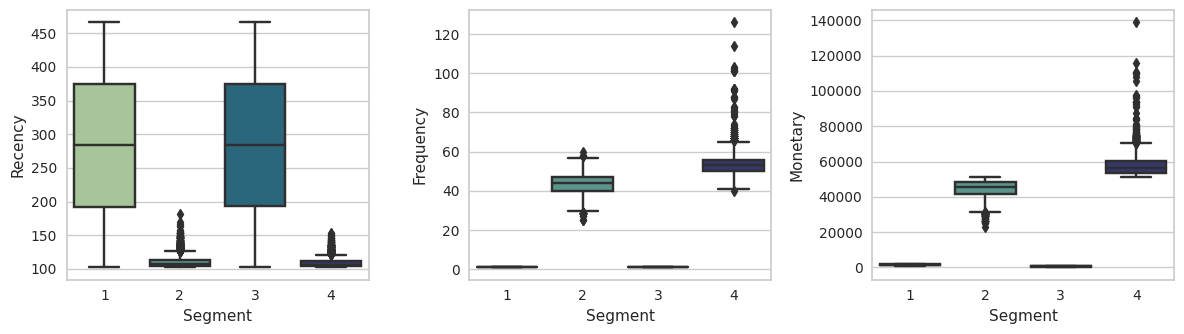

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(12,3.5))
cols = ['Recency', 'Frequency', 'Monetary']
pal = {1: "#a5cd90", 2: "#519e90", 3:"#1e6c8a", 4:"#2c3172"}
for i,c in enumerate(cols):
        sns.boxplot(data=data1, x='Segment', y=c, ax=axs[i], palette=pal)
plt.tight_layout()

We have identified two distinct customer clusters among those who have had only one transaction with the business: Segment 1 and Segment 3. Notably, Segment 1 comprises customers who are higher spenders. We will categorize Segment 1 as our "Substantial Solo Spenders" and Segment 3 as our "Explorers".

In contrast, Segment 2 and Segment 4 not only make frequent purchases but are also significant spenders, with Segment 4 being the highest spenders. Therefore, we will designate Segment 2 as our "Loyal Customers" and Segment 4 as our "Elite High-Spending Patrons".

In [62]:
totalcustomers = data1.groupby('Segment').size() / data1.shape[0]
totalcustomers

Segment
1    0.497067
2    0.004032
3    0.495560
4    0.003341
dtype: float64

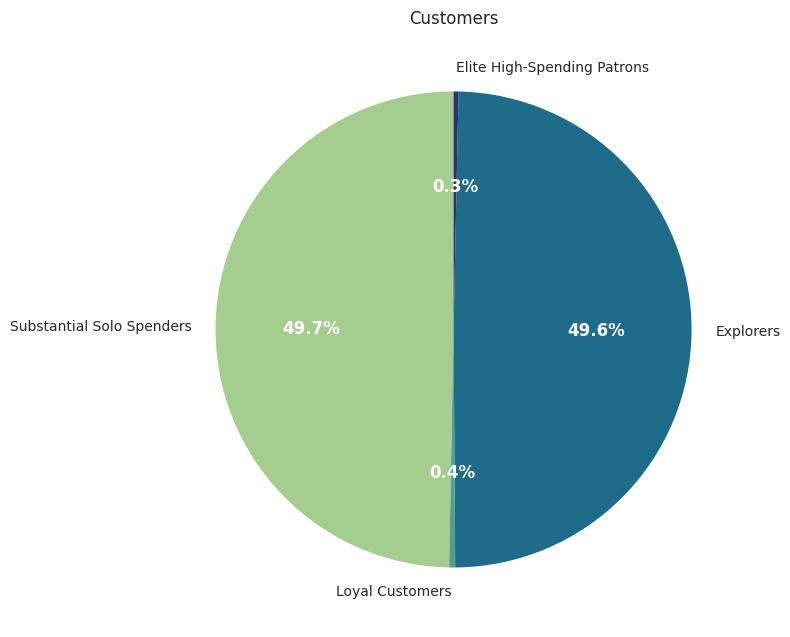

In [63]:
segment_colors = ["#a5cd90", "#519e90", "#1e6c8a", "#2c3172"]
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, pcts = ax.pie(
    totalcustomers, labels=['Substantial Solo Spenders', 'Loyal Customers', 'Explorers', 'Elite High-Spending Patrons'], autopct='%1.1f%%',
    startangle = 90, colors=segment_colors)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Customers')
plt.tight_layout()

The distribution of our total customers over the covered time period is as follows: 49.7% Substantial Solo Spenders, 49.6% Explorers 0.4% Loyal Customers, and 0.3% are Elite High-Spending Patrons. More than 99% of the total customers have purchased once only.

In [64]:
totalsales = (data1.groupby('Segment').sum()/data1.Monetary.sum()).Monetary
totalsales

Segment
1    0.535783
2    0.126447
3    0.201413
4    0.136358
Name: Monetary, dtype: float64

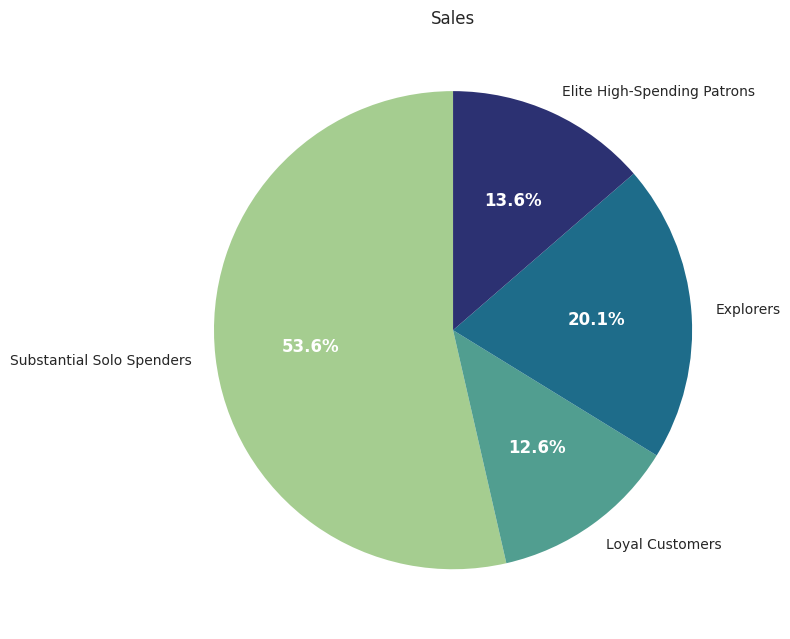

In [65]:
totalsales = (data1.groupby('Segment').sum()/data1.Monetary.sum()).Monetary
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, pcts = ax.pie(
    totalsales, labels=['Substantial Solo Spenders', 'Loyal Customers', 'Explorers', 'Elite High-Spending Patrons'], autopct='%1.1f%%',
    startangle = 90, colors=segment_colors)
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title('Sales')
plt.tight_layout()

While the Loyal Customers make up only 0.4% of the total customer base, they remarkably contribute approximately 12.6% to the total sales. Similarly, Elite High-Spending Patrons constitute only 0.3% of the total customer base but account for about 13.6% of the total sales. These segments, though comprising only about 0.7% of the total customer base, collectively contribute to 26.2% of the total sales. In contrast, Explorers, representing 49.6% of the total customers, contribute only 20.1% to the total sales.

### <span style="color:#808080">Summary of Results</span>

Our customers can be grouped into three clusters:

1. **Explorers** - comprises customers who had only one transaction and spent the least compared to those in other clusters. These customers account for approximately 49.6% of the total customer base, yet their contributions to the company's overall sales amount to just 20.1%.
2. **Substantial Solo Spenders** - the customers who had only one transaction, but are more substantial spenders in comparison to the first cluster. This group constitutes around 49.7% of the total customer base and contributes significantly, making up approximately 53.6%, of the total sales.
3. **Loyal Customers** - customers who had multiple transactions, constitute only about 0.3% of the total customers yet contributed to about 12.6% of the total sales of the company. We can label these customers as our loyal customers.
4. **Elite High-Spending Patrons** - customers who had multiple transactions and are the biggest spenders, constitute only about 0.4% of the total customers yet contributed to about 13.6% of the total sales of the company.

Additionally, more than 99% of our customers have purchased once only and remarkably, even though the Best Customers and Second Tier Loyal Customers constitute less than 1% of the total customer base, these segments account for a total of 26.2% of the total sales.

### <span style="color:#808080">Insights and Recommendations</span>

Given that only a small percentage of the customers display loyalty to the company, it is imperative that the company will focus its efforts on nurturing loyalty. To achieve this, several strategies can be put into action:

1. **Loyalty Programs**: The company can establish loyalty programs that rewards repeat customers. These incentives might encompass discounts, exclusive access to products or services, or personalized offers tailored to individual preferences.
2. **Enhanced Post-Purchase Support**: In addition to the existing product warranties, the company should consider augmenting post-purchase support. This could involve the introduction of programs such as installation guidance, troubleshooting assistance, and maintenance tips. The aim is to provide customers with comprehensive assistance throughout their ownership experience.
3. **Continuous Feedback Collection**: To foster loyalty, it is vital to actively gather, evaluate, and monitor customer feedback, which can serve as a valuable source of insights for making improvements based on the customers' suggestions.  

Additionally, tailored recommendations per segment are recommended as follows:

Explorers  | Substantial Solo Spenders | Loyal Customers | Elite High-Spending Patrons
-----|-----|-----|-----
Offer introductory discounts or bundled deals to entice first-time buyers|Reward a Welcome Gift or Voucher and, aim to get them to buy again or make an offer that is highly complementary to one of their past purchase|Big discounts may be unnecessary, instead promote cross-selling by offering bundles of products|Should be given utmost priority; suggest big-ticket items and implement systems that will recommend products based on past purchases
Try offering special bonuses when they reach a certain spend threshold (e.g. free shipping)|Discounts may be necessary, promote cross-selling and upselling|Upsell by offering premium products (e.g. the latest or most advanced model)|Special and exclusive care such as premium loyalty rewards and early access to new collection
Create specific customer journeys aimed at engaging and retaining these customers|Highlight personalized offers, emphasize quality, and showcase additional benefits for loyal customers|Promote premium loyalty rewards which are only enjoyed when a minimum total annual spend is reached|Send Thank-You letters and real-time alerts

### <span style="color:#808080">Further Studies</span>

Try different models, then choose a baseline model. After that, tune the baseline model by adjusting the hyperparameters such as the number of clusters. Along with domain knowledge and business understanding, determine the final model and refine the recommendations. Continuous monitoring of customer behavior is also recommended to adapt and optimize the approaches over time.